<a href="https://colab.research.google.com/github/charan2909/NN_ICP4/blob/main/700754801_NN_ICP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spring** **2024**: **CS5720**

**Neural Networks & Deep Learning - ICP-4**

**1. Data Manipulation**

In [1]:
# importing necessary libraries for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read the data
df = pd.read_csv('data.csv')

In [4]:
# basic statistics about the data
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [5]:
# checking the null values
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [6]:
# to view basic information about the featues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [7]:
# replaced the null values in column calories with mean
df['Calories'].fillna(df.Calories.mean(),inplace=True)

In [8]:
# checking the null values
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [9]:
# the aggregate information with various funtions on columns Pulse and Maxpulse
df[['Pulse','Maxpulse']].agg(['min','max','count','mean'])

,Pulse,Maxpulse
min,80.000000,100.000000
max,159.000000,184.000000
count,169.000000,169.000000
mean,107.461538,134.047337


In [10]:
# filter the dataframe to select the rows with calories between 500 and 1000
df.loc[(df.Calories >= 500) & (df.Calories <= 1000)]

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [11]:
# filter the dataframe to select the rows with calories between 500 and 1000
df.loc[(df.Calories > 500) & (df.Pulse <= 100)]

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
79,270,100,131,1729.0
87,120,100,157,1000.1
99,90,93,124,604.1
103,90,90,100,500.4


In [12]:
# creating new dataframe without Maxpulse feature
df_modified = df.drop('Maxpulse',axis = 1)

In [13]:
# view the head of new data frame
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [14]:
# drop the maxpulse column from the datafram
df.drop('Maxpulse',axis = 1,inplace=True)
df.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


In [15]:
# convert the datatype of column Calories to int datatype
df['Calories'] = df.Calories.astype(int)

In [16]:
# print info to see the data type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Duration  169 non-null    int64
 1   Pulse     169 non-null    int64
 2   Calories  169 non-null    int64
dtypes: int64(3)
memory usage: 4.1 KB


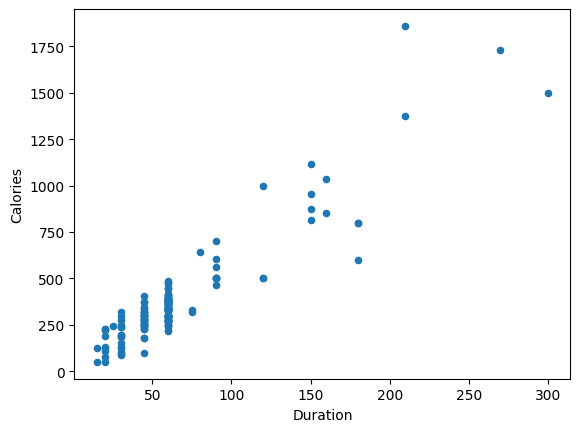

In [17]:
# Using pandas create a scatter plot for the two columns (Duration and Calories)
df.plot(x = 'Duration',
        y = 'Calories',
        kind = 'scatter')
plt.show()

**2**.**Linear** **Regression**

In [21]:
# read the dataset
salary_df = pd.read_csv('Salary_Data.csv')

In [23]:
# view basic information about the features
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [24]:
# import necessary libraries
from sklearn.model_selection import train_test_split

In [25]:
# arrange the data to numpy arrays
X = salary_df.iloc[:, :-1].values
y = salary_df.iloc[:, 1].values

In [26]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,y,random_state = 0,test_size= 0.35)

In [27]:
# Fitting Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [28]:
# Predicting the Test set result

Y_Pred = regressor.predict(X_Test)

In [29]:
# calculate the mse
from sklearn.metrics import mean_squared_error

In [30]:
mse = mean_squared_error(Y_Test,Y_Pred)

In [31]:
mse

19421097.588238075

<ipython-input-32-628dbf185d5e>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Y_Train, y_train_pred, cmap='Reds', edgecolor='black',


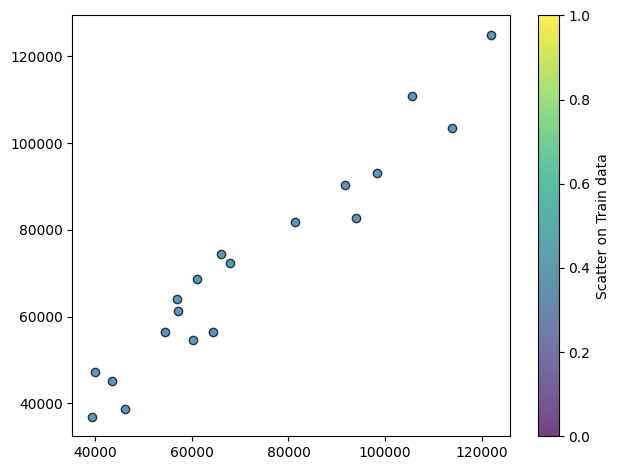

In [32]:
# visulalize both train set results


# color and size on a per mark basis
y_train_pred = regressor.predict(X_Train)

plt.scatter(Y_Train, y_train_pred, cmap='Reds', edgecolor='black',
            linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('Scatter on Train data')


plt.tight_layout()

plt.show()

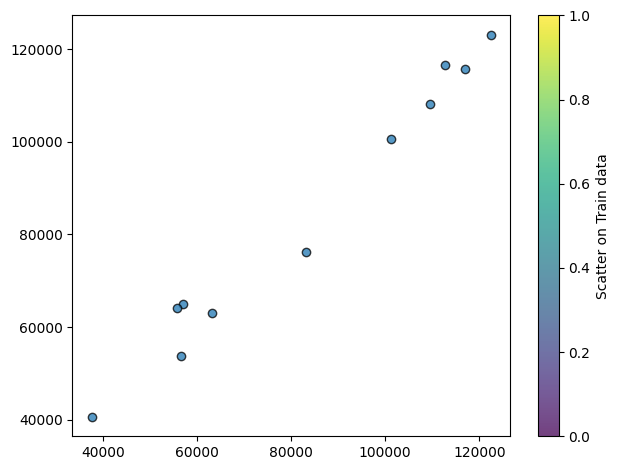

In [33]:
# visulalize both test set results


# color and size on a per mark basis
y_pred = regressor.predict(X_Test)


plt.scatter(Y_Test, y_pred, edgecolor='black',
            linewidth=1, alpha=0.75)
cbar = plt.colorbar()
cbar.set_label('Scatter on Train data')


plt.tight_layout()

plt.show()